# Import necessary library and Load data

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
#data = pd.read_csv('/content/drive/MyDrive/DataSets/All-Planets-Dataset.csv')
#data = data[['mass', 'period', 'host_star_mass', 'host_star_temperature']]
data = pd.read_csv('/content/drive/MyDrive/DataSets/6_class_star.csv')
data.shape

(240, 7)

In [50]:
data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [51]:
# Нужно ли масштабирование
data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [52]:
# DataFrame не содержащий целевой признак
X_ALL = data[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Star type']].drop('Absolute magnitude(Mv)', axis=1)

In [53]:
# Функция для восстановления датафрейма
# на основе масштабированных данных
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [54]:
# devide the dataset into test and train
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data['Absolute magnitude(Mv)'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((192, 4), (48, 4))

In [55]:
X_ALL.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type
0,3068,0.002400,0.1700,0
1,3042,0.000500,0.1542,0
2,2600,0.000300,0.1020,0
3,2800,0.000200,0.1600,0
4,1939,0.000138,0.1030,0


# i.масштабирование признаков (не менее чем тремя способами);

## 1).Масштабирование данных на основе Z-оценки

In [56]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type
0,-0.779382,-0.598624,-0.459210,-1.46385
1,-0.782110,-0.598624,-0.459241,-1.46385
2,-0.828477,-0.598624,-0.459342,-1.46385
3,-0.807496,-0.598624,-0.459229,-1.46385
4,-0.897819,-0.598624,-0.459340,-1.46385


In [57]:
data_cs11_scaled.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type
count,2.400000e+02,2.400000e+02,2.400000e+02,2.400000e+02
mean,-1.480297e-17,2.960595e-17,-1.572816e-17,-2.405483e-17
std,1.002090e+00,1.002090e+00,1.002090e+00,1.002090e+00
min,-8.978190e-01,-5.986236e-01,-4.595230e-01,-1.463850e+00
25%,-7.504023e-01,-5.986236e-01,-4.593402e-01,-8.783101e-01
50%,-4.953014e-01,-5.986232e-01,-4.580618e-01,0.000000e+00
75%,4.781574e-01,5.074424e-01,-3.767029e-01,8.783101e-01
max,3.094941e+00,4.145201e+00,3.316058e+00,1.463850e+00


In [58]:
def draw_kde(col_list, df1, df2, label1, label2):
    fig, (ax1, ax2) = plt.subplots(
        ncols=2, figsize=(12, 5))
    # первый график
    ax1.set_title(label1)
    sns.kdeplot(data=df1[col_list], ax=ax1)
    # второй график
    ax2.set_title(label2)
    sns.kdeplot(data=df2[col_list], ax=ax2)
    plt.show()

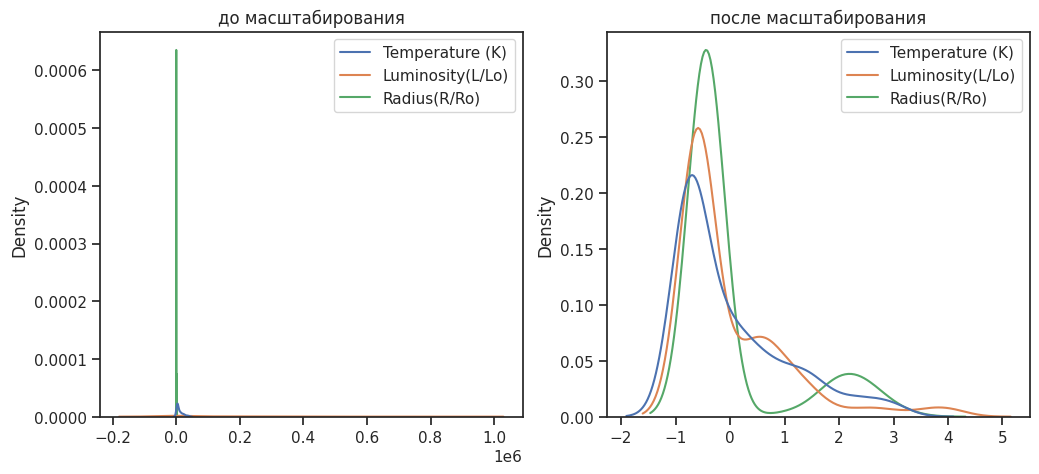

In [59]:
draw_kde(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], data, data_cs11_scaled, 'до масштабирования', 'после масштабирования')

## 2).Масштабирование "Mean Normalisation"

In [60]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [61]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type
count,240.000000,240.000000,240.000000,240.000000
mean,0.004099,0.004655,0.009761,0.014583
std,0.255412,0.211241,0.290702,0.342279
min,-0.224737,-0.121535,-0.123544,-0.485417
25%,-0.187164,-0.121535,-0.123491,-0.285417
50%,-0.122144,-0.121535,-0.123120,0.014583
75%,0.125971,0.111624,-0.099519,0.314583
max,0.792937,0.878465,0.971734,0.514583


In [62]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)
data_cs22_scaled_train.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type
count,1.920000e+02,1.920000e+02,1.920000e+02,1.920000e+02
mean,-1.156482e-18,-1.387779e-17,9.251859e-18,-3.700743e-17
std,2.494143e-01,2.072907e-01,2.788614e-01,3.451926e-01
min,-2.070634e-01,-1.215350e-01,-1.235443e-01,-4.854167e-01
25%,-1.872573e-01,-1.215350e-01,-1.234920e-01,-2.854167e-01
50%,-1.647640e-01,-1.215349e-01,-1.232483e-01,-8.541667e-02
75%,1.393136e-01,1.089164e-01,-1.028912e-01,3.145833e-01
max,7.929366e-01,8.784650e-01,8.764557e-01,5.145833e-01


In [63]:
data_cs22_scaled_test.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type
count,48.000000,48.000000,48.000000,48.000000
mean,0.020493,0.023276,0.048806,0.072917
std,0.280331,0.227702,0.334312,0.327358
min,-0.224737,-0.121535,-0.123544,-0.485417
25%,-0.182812,-0.121535,-0.123486,-0.085417
50%,-0.088347,-0.121529,-0.122725,0.114583
75%,0.073679,0.120866,-0.073661,0.314583
max,0.736306,0.860361,0.971734,0.514583


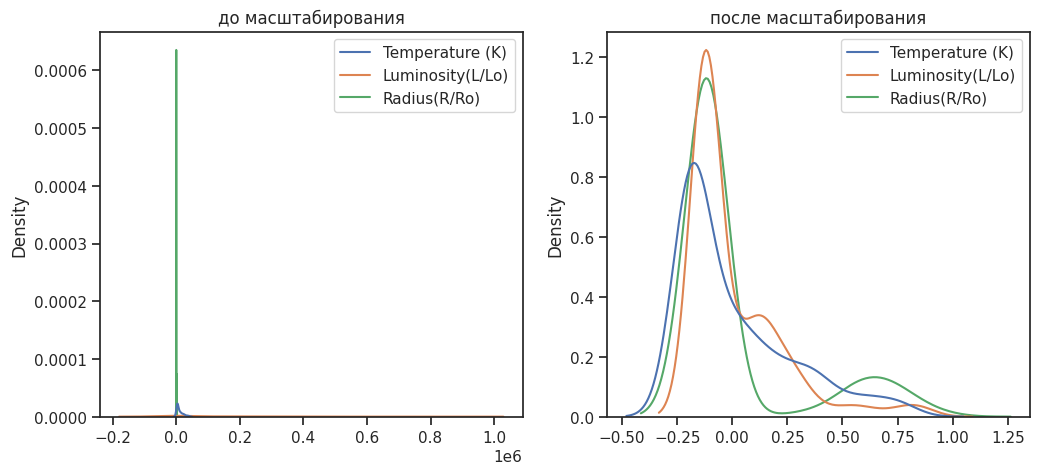

In [64]:
draw_kde(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], data, data_cs21_scaled, 'до масштабирования', 'после масштабирования')

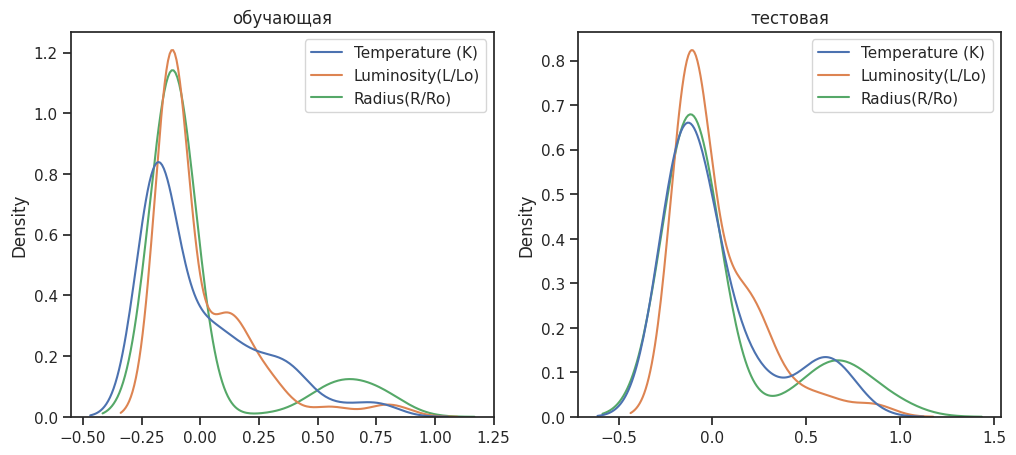

In [65]:
draw_kde(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], data_cs22_scaled_train, data_cs22_scaled_test, 'обучающая', 'тестовая')

## 3). MinMax-масштабирование

In [66]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type
count,240.000000,2.400000e+02,240.000000,240.000000
mean,0.224862,1.261901e-01,0.121709,0.500000
std,0.250977,2.112409e-01,0.265413,0.342279
min,0.000000,0.000000e+00,0.000000,0.000000
25%,0.036921,9.238657e-10,0.000048,0.200000
50%,0.100812,8.290363e-08,0.000387,0.500000
75%,0.344618,2.331591e-01,0.021936,0.800000
max,1.000000,1.000000e+00,1.000000,1.000000


In [67]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)

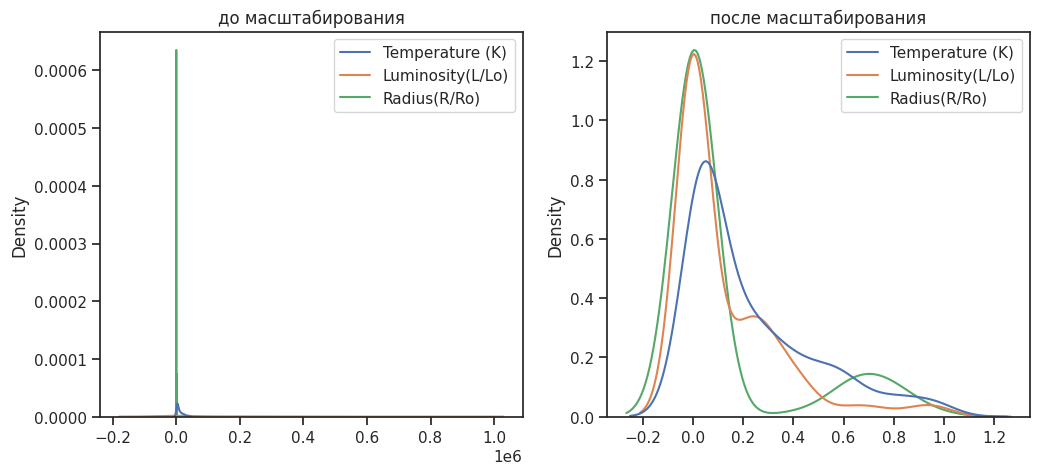

In [68]:
draw_kde(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], data, data_cs31_scaled, 'до масштабирования', 'после масштабирования')

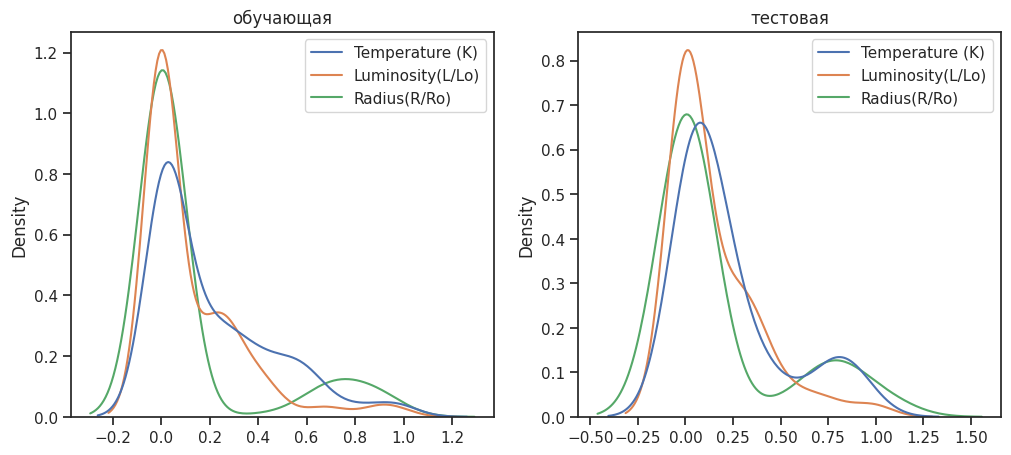

In [69]:
draw_kde(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], data_cs32_scaled_train, data_cs32_scaled_test, 'обучающая', 'тестовая')

## 4).Масштабирование по медиане

In [70]:
cs41 = RobustScaler()
data_cs41_scaled_temp = cs41.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs41_scaled = arr_to_df(data_cs41_scaled_temp)
data_cs41_scaled.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Star type
count,240.000000,2.400000e+02,2.400000e+02,2.400000e+02
mean,0.403156,5.412183e-01,5.543037e+00,-5.551115e-18
std,0.815662,9.059947e-01,1.212636e+01,5.704648e-01
min,-0.327634,-3.555668e-07,-1.768227e-02,-8.333333e-01
25%,-0.207642,-3.516044e-07,-1.546993e-02,-5.000000e-01
50%,0.000000,-1.323489e-23,1.301043e-18,0.000000e+00
75%,0.792358,9.999996e-01,9.845301e-01,5.000000e-01
max,2.922318,4.288917e+00,4.567088e+01,8.333333e-01


In [71]:
cs42 = RobustScaler()
cs42.fit(X_train)
data_cs42_scaled_train_temp = cs42.transform(X_train)
data_cs42_scaled_test_temp = cs42.transform(X_test)
# формируем DataFrame на основе массива
data_cs42_scaled_train = arr_to_df(data_cs42_scaled_train_temp)
data_cs42_scaled_test = arr_to_df(data_cs42_scaled_test_temp)

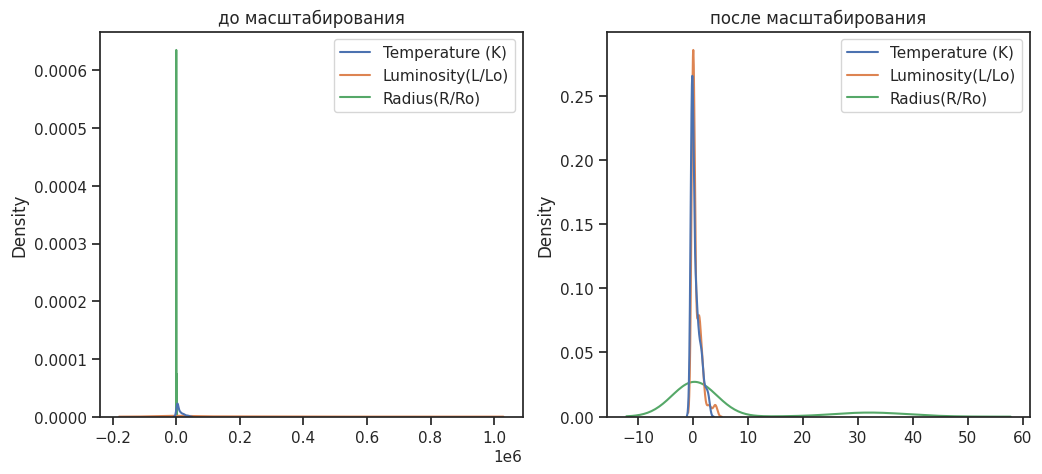

In [72]:
draw_kde(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], data, data_cs41_scaled, 'до масштабирования', 'после масштабирования')

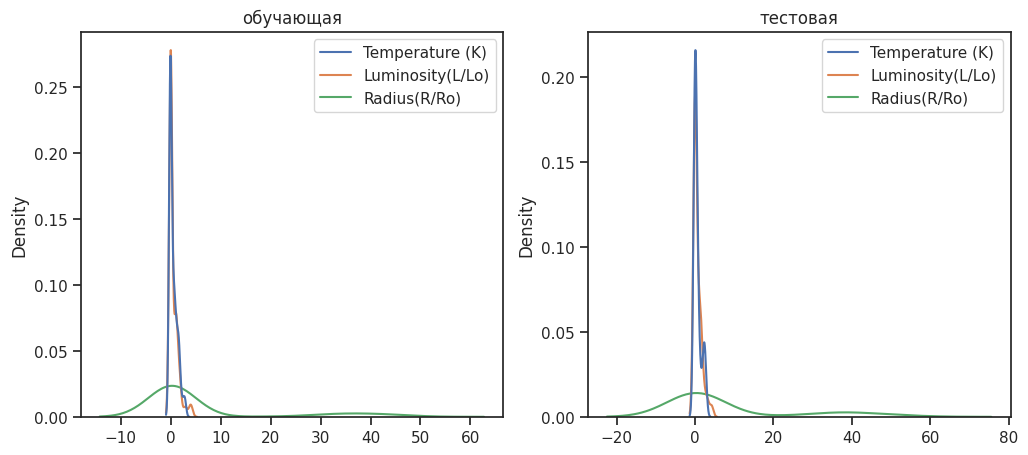

In [73]:
draw_kde(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)'], data_cs42_scaled_train, data_cs42_scaled_test, 'обучающая', 'тестовая')

# ii.обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [75]:
ori_data = pd.read_csv('/content/drive/MyDrive/DataSets/All-Planets-Dataset.csv')
ori_data.shape

(822, 9)

In [76]:
ori_data.head()

,name,mass,radius,period,semi_major_axis,temperature,distance_light_year,host_star_mass,host_star_temperature
0,HD 240210 b,5.2100,NaN,501.750000,1.16000,NaN,465.96,0.82,4297.0
1,Gliese 1214 b,0.0197,0.254,1.580405,0.01411,547.0,47.78,0.15,3026.0
2,CoRoT-30 b,2.9000,1.009,9.060050,0.08440,NaN,3100.00,0.98,5650.0
3,HD 4203 b,2.2300,NaN,431.880000,1.17000,NaN,266.05,1.25,5596.0
4,HD 4203 c,2.1700,NaN,6700.000000,6.95000,NaN,253.80,1.13,5702.0


In [77]:
columns = ori_data.columns.tolist()
columns

['name',
 'mass',
 'radius',
 'period',
 'semi_major_axis',
 'temperature',
 'distance_light_year',
 'host_star_mass',
 'host_star_temperature']

In [78]:
x_col_list = ['mass', 'radius', 'period']
data = pd.DataFrame(ori_data)[x_col_list]
data['Y'] = ori_data['host_star_temperature']
data.shape

(822, 4)

In [79]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])    
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])  
    fig.suptitle(title)
    plt.show()

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


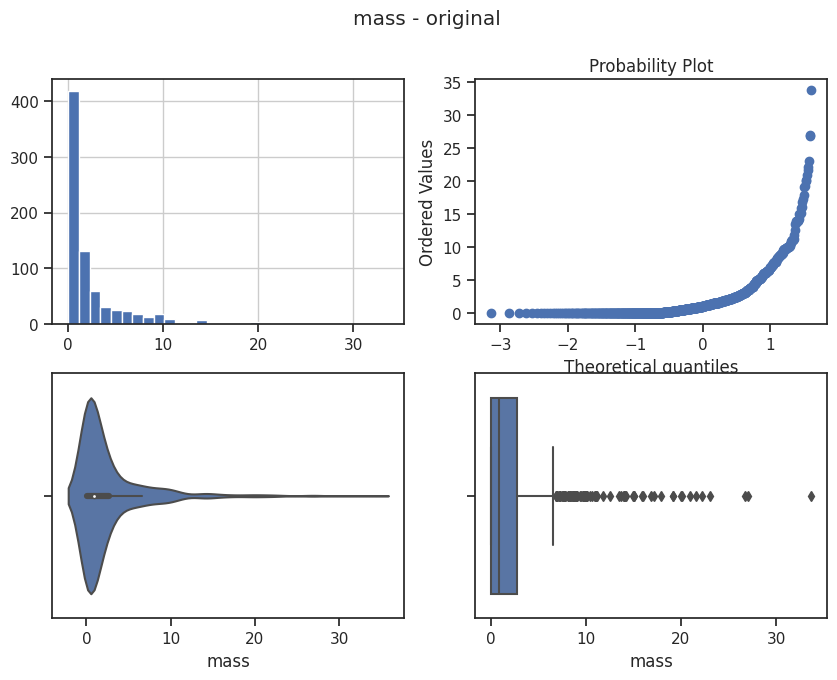

In [80]:
diagnostic_plots(data, 'mass', 'mass - original')

### a.Устранение выбросов

In [81]:
# Тип вычисления верхней и нижней границы выбросов
from enum import Enum
class OutlierBoundaryType(Enum):
    SIGMA = 1
    QUANTILE = 2
    IRQ = 3

In [82]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col, outlier_boundary_type: OutlierBoundaryType):
    if outlier_boundary_type == OutlierBoundaryType.SIGMA:
        K1 = 3
        lower_boundary = df[col].mean() - (K1 * df[col].std())
        upper_boundary = df[col].mean() + (K1 * df[col].std())

    elif outlier_boundary_type == OutlierBoundaryType.QUANTILE:
        lower_boundary = df[col].quantile(0.05)
        upper_boundary = df[col].quantile(0.95)

    elif outlier_boundary_type == OutlierBoundaryType.IRQ:
        K2 = 1.5
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (K2 * IQR)
        upper_boundary = df[col].quantile(0.75) + (K2 * IQR)

    else:
        raise NameError('Unknown Outlier Boundary Type')
        
    return lower_boundary, upper_boundary   

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


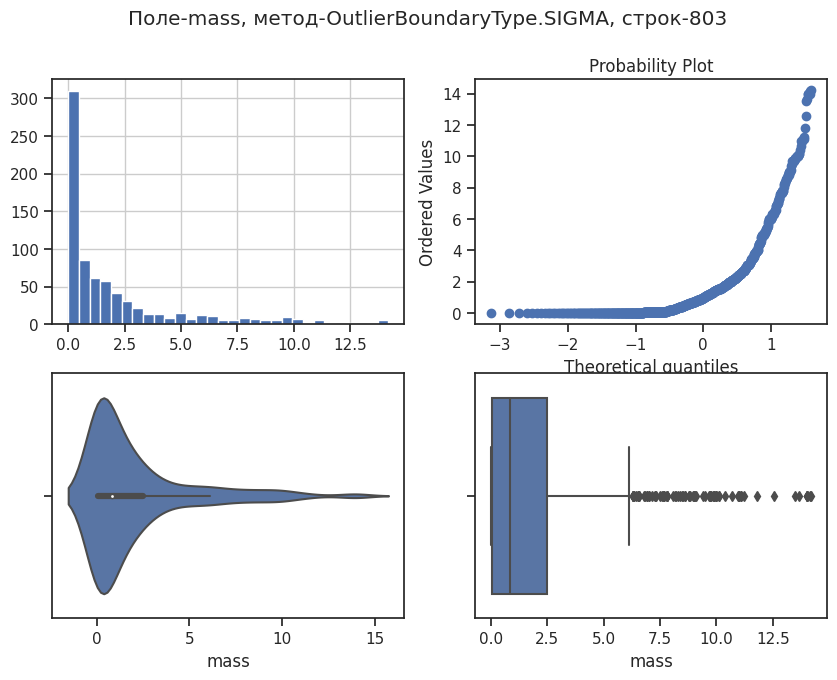

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


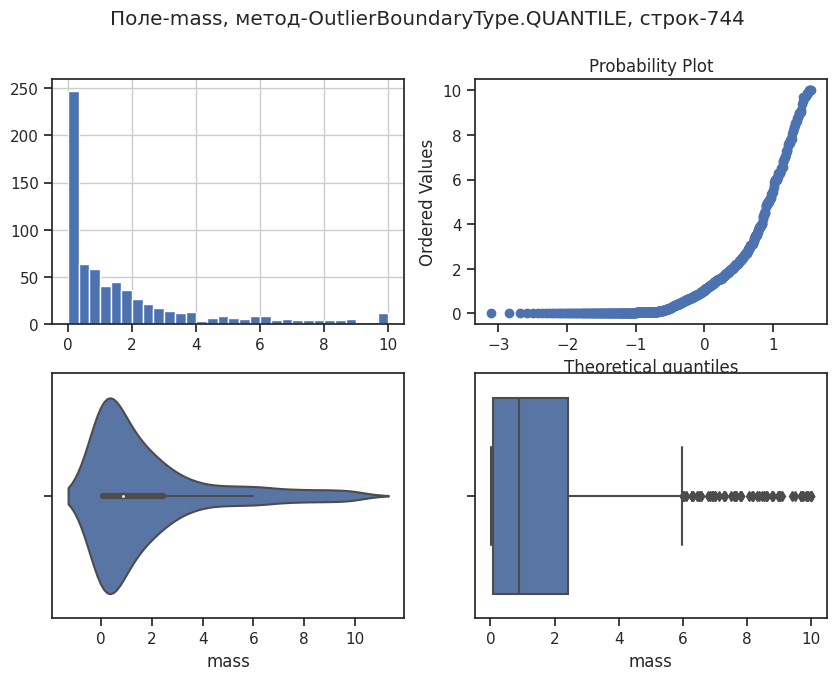

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


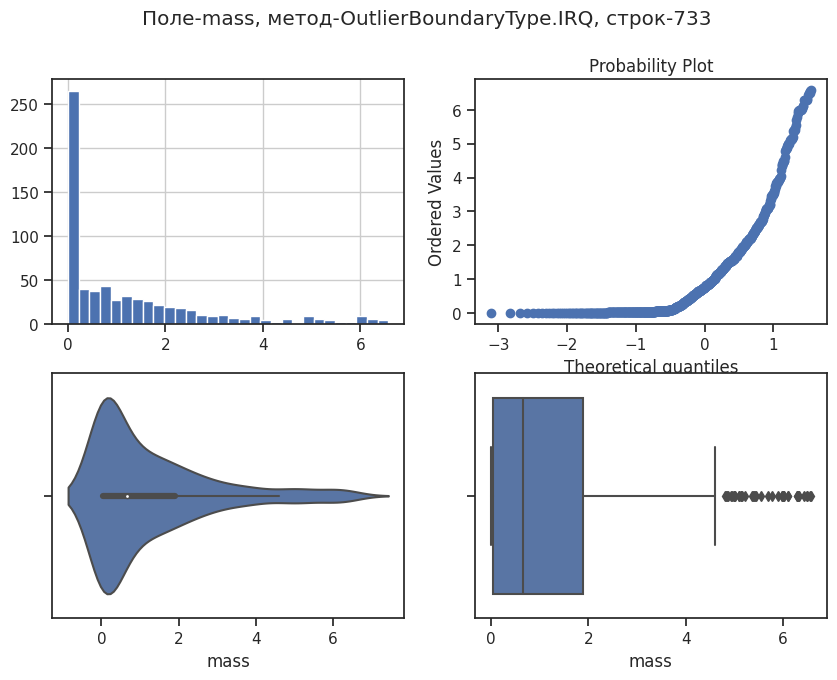

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


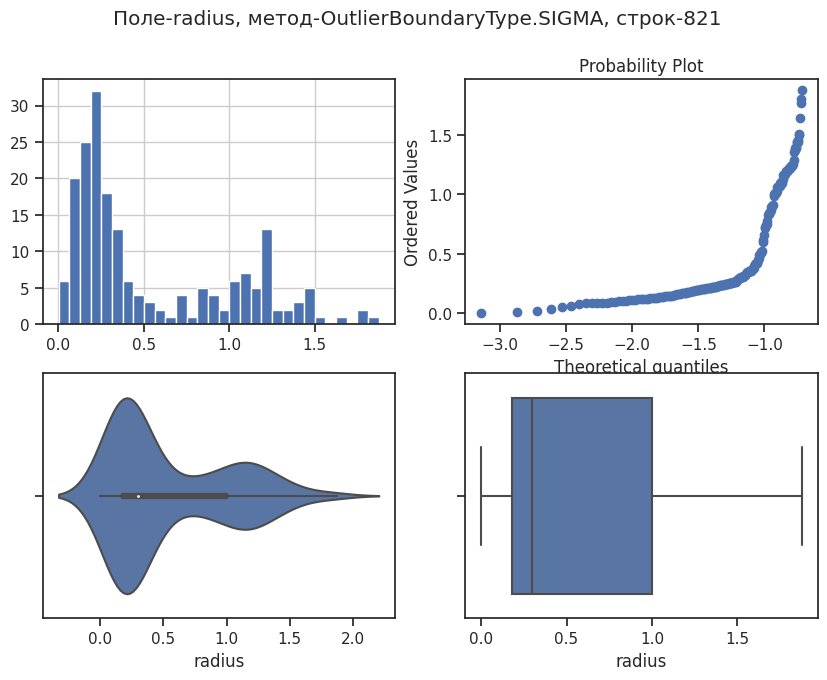

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


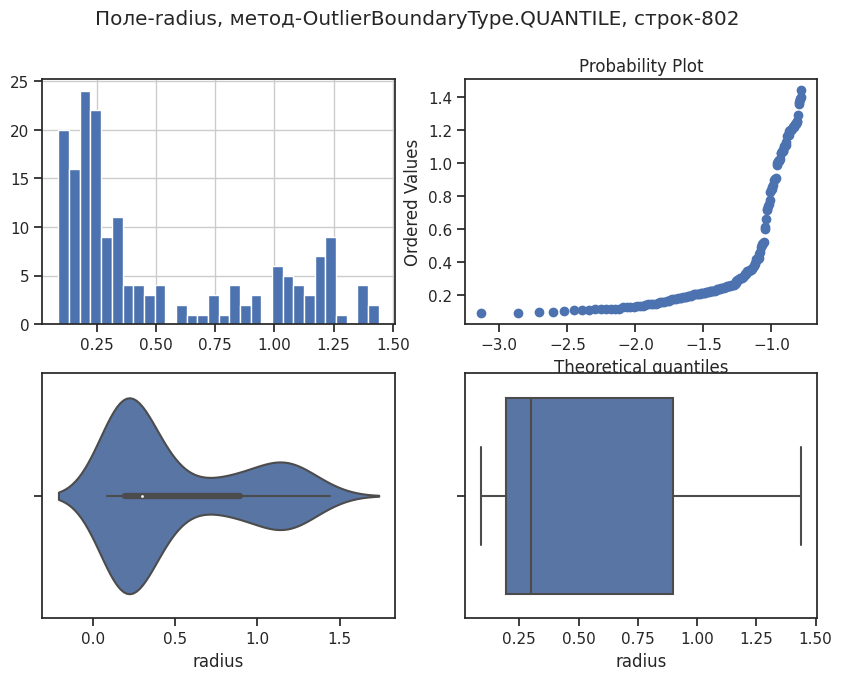

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


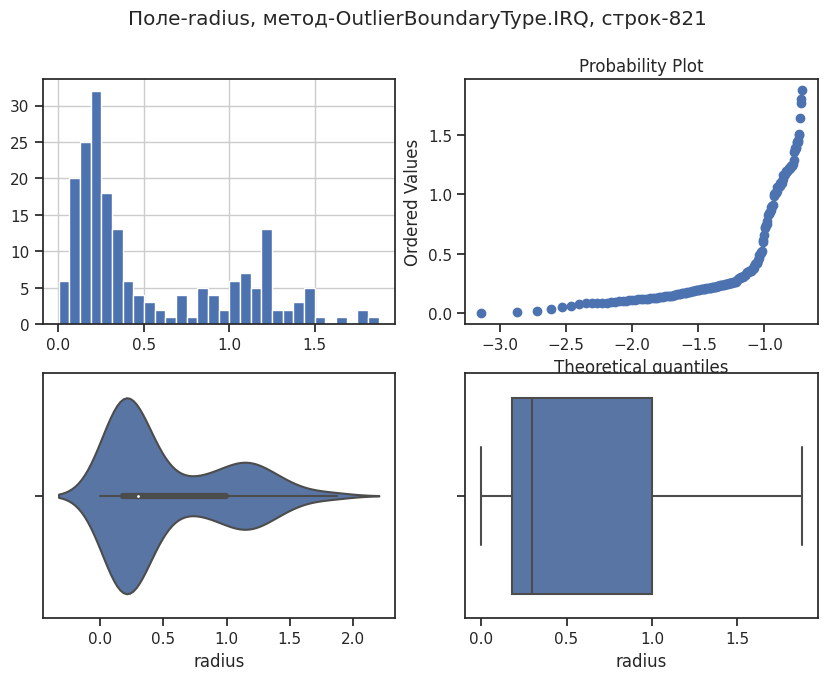

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


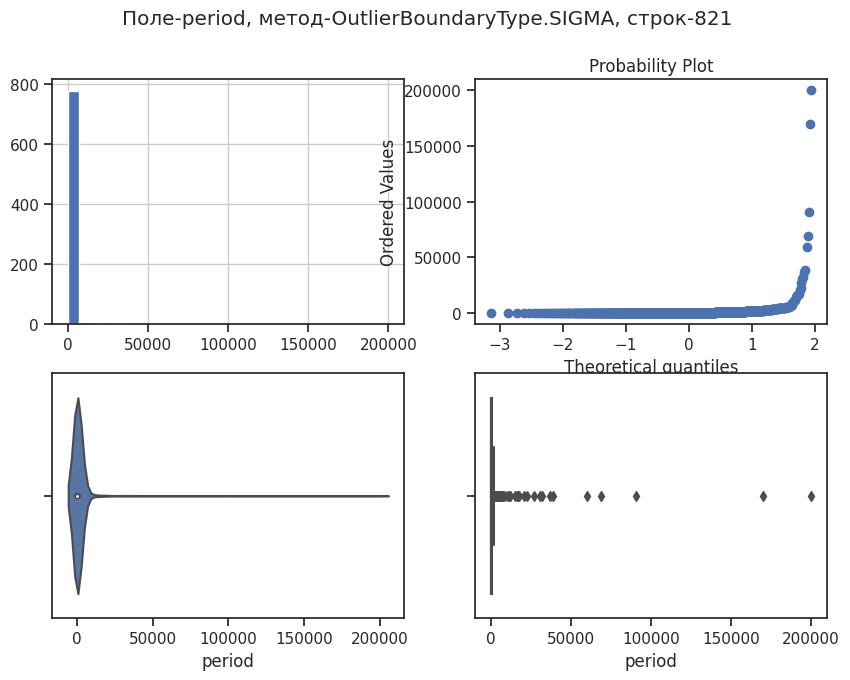

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


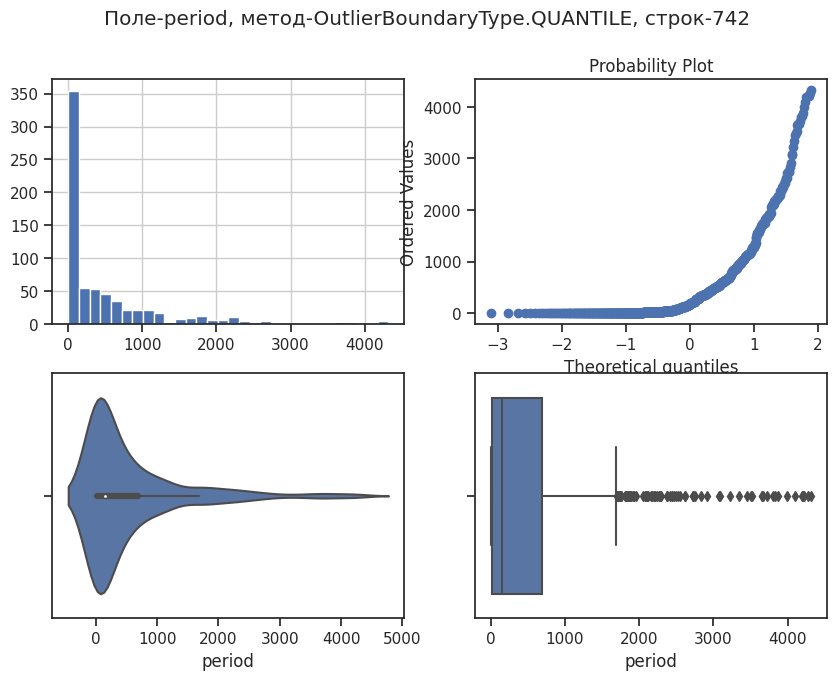

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


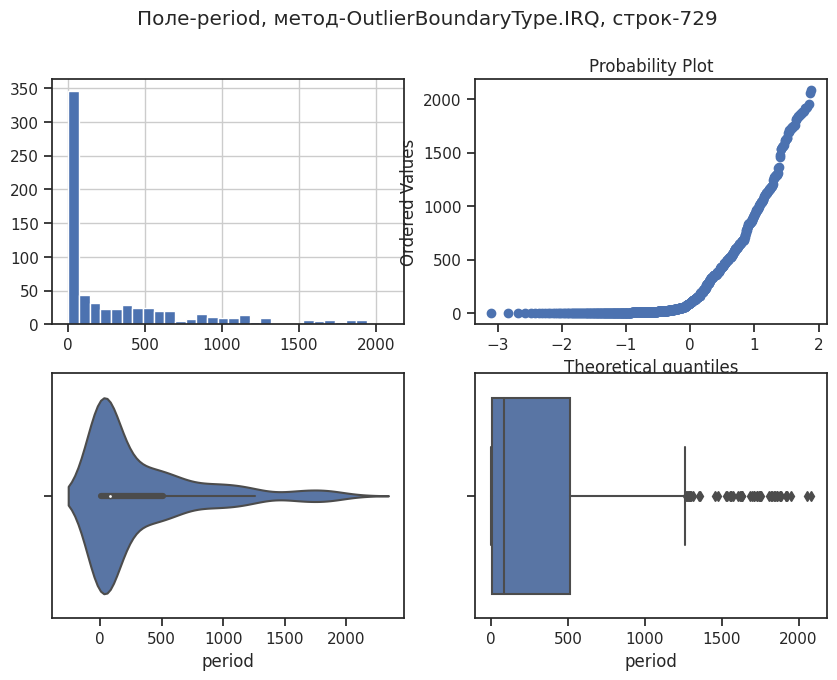

In [83]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Флаги для удаления выбросов
        outliers_temp = np.where(data[col] > upper_boundary, True, 
                                 np.where(data[col] < lower_boundary, True, False))
        # Удаление данных на основе флага
        data_trimmed = data.loc[~(outliers_temp), ]  
        title = 'Поле-{}, метод-{}, строк-{}'.format(col, obt, data_trimmed.shape[0])
        diagnostic_plots(data_trimmed, col, title)

### б.Замена выбросов

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


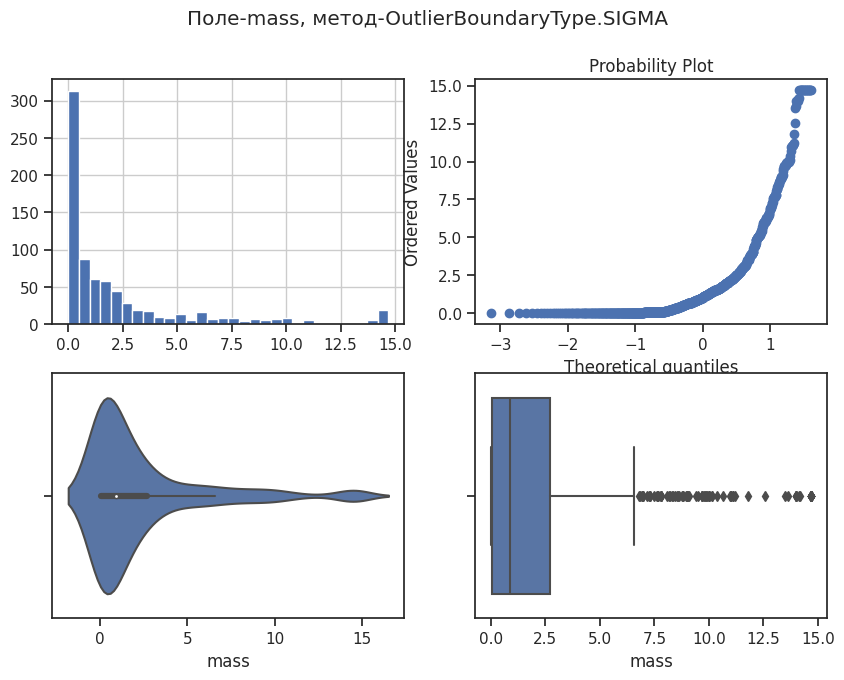

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


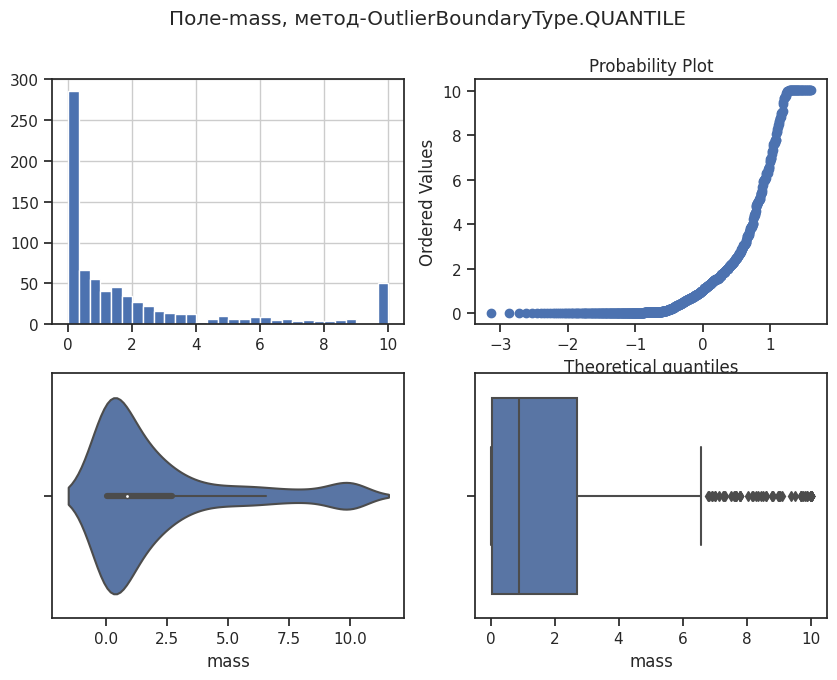

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


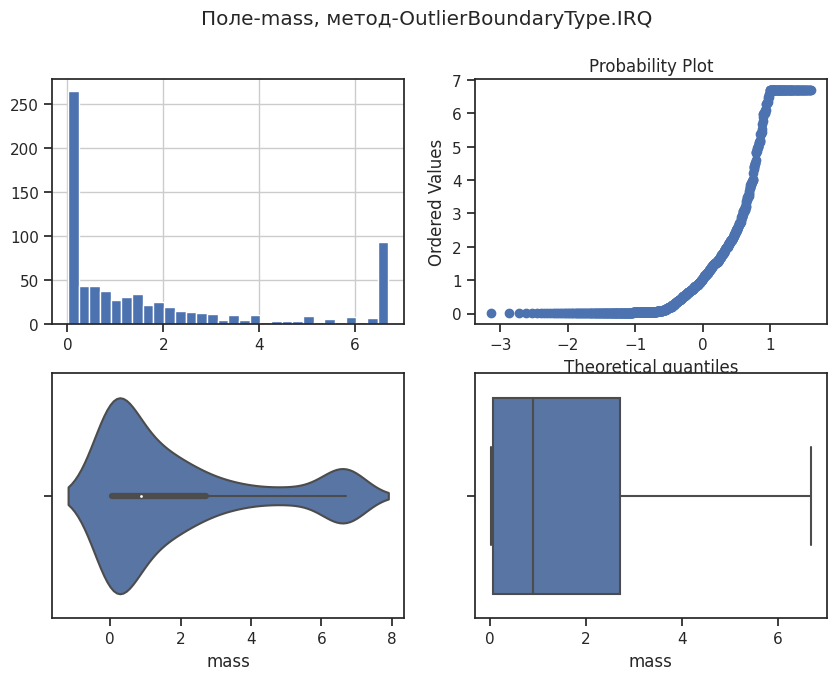

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


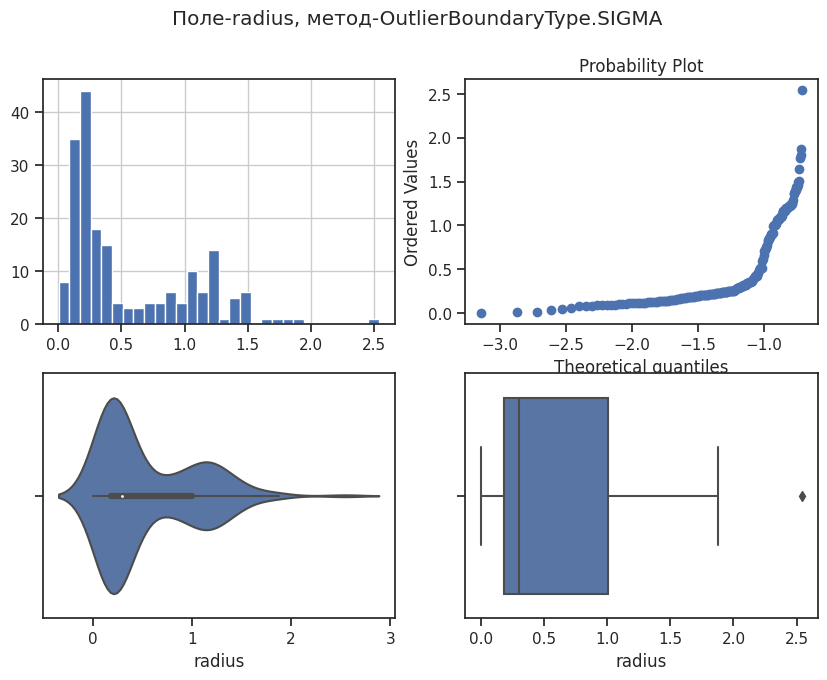

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


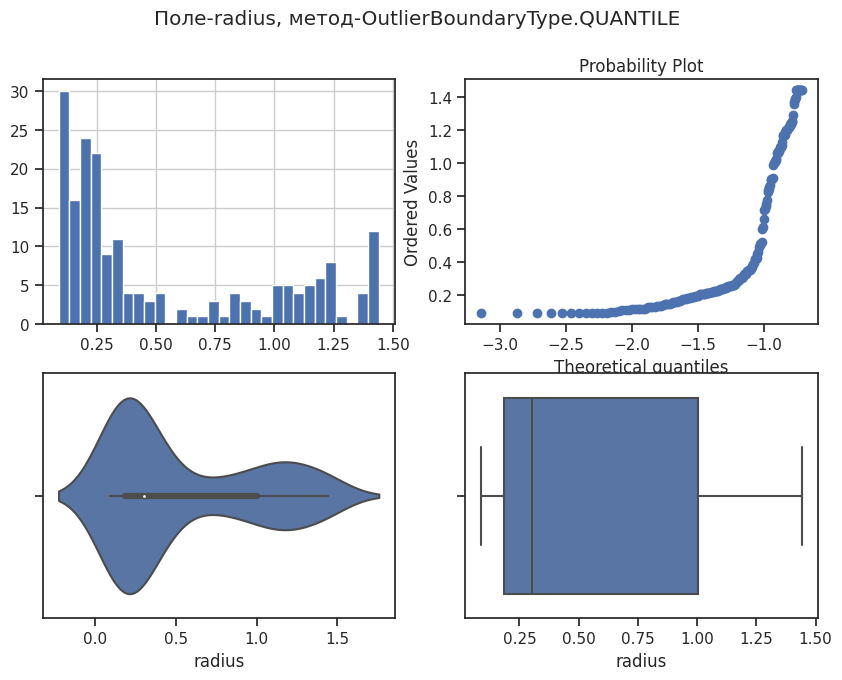

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


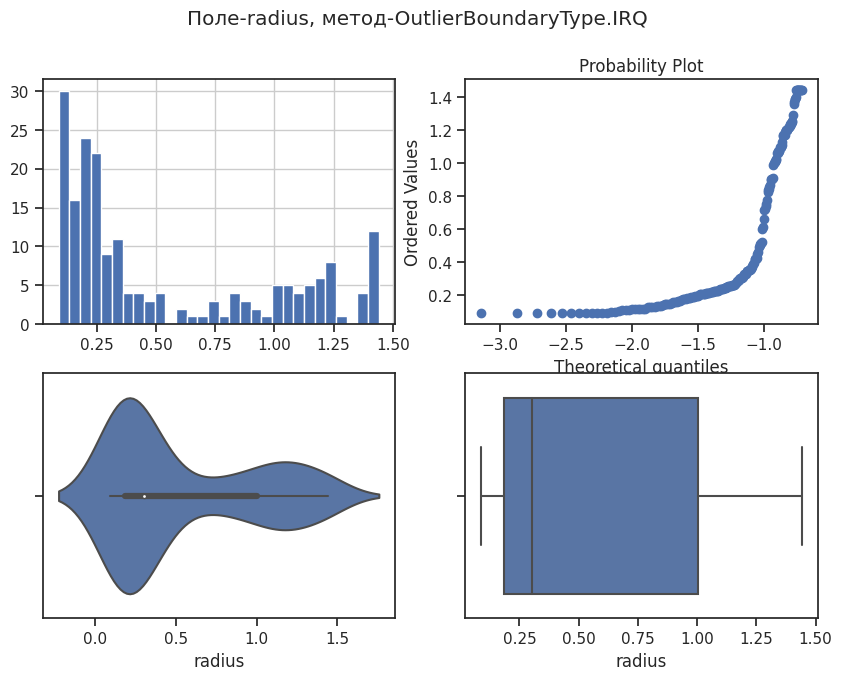

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


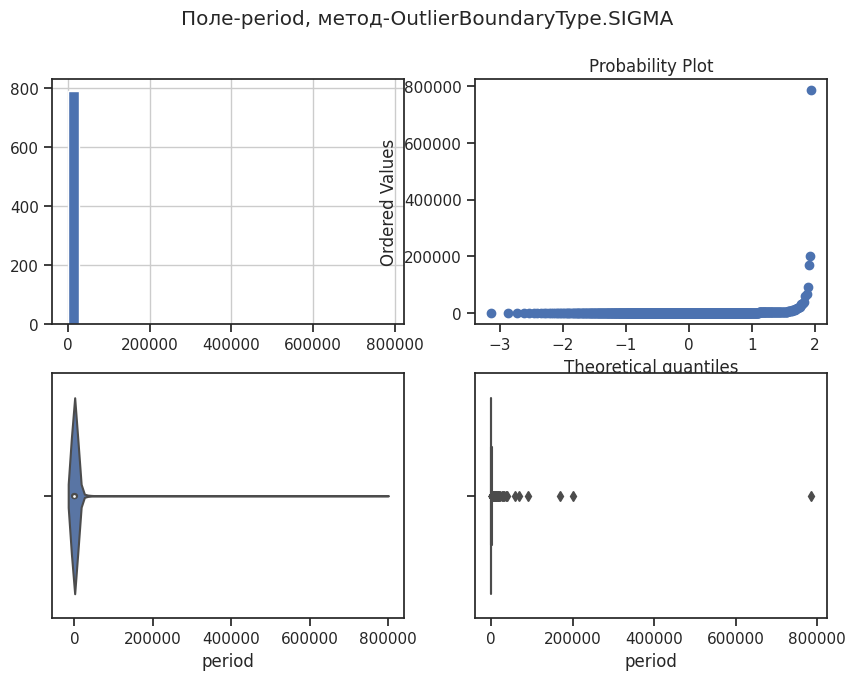

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


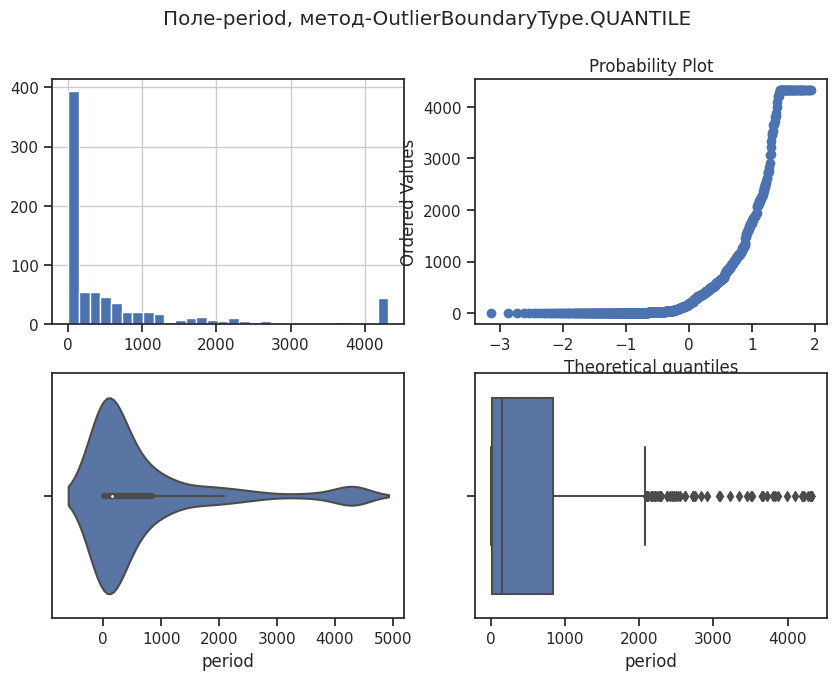

<ipython-input-79-1fe78d5d2ee2>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


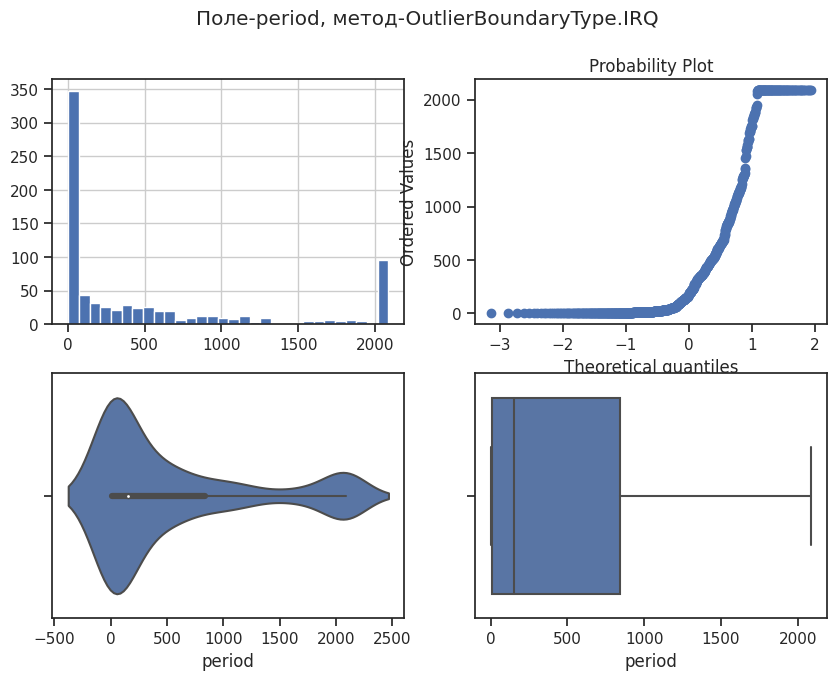

In [84]:
for col in x_col_list:    
    for obt in OutlierBoundaryType:
        # Вычисление верхней и нижней границы
        lower_boundary, upper_boundary = get_outlier_boundaries(data, col, obt)
        # Изменение данных
        data[col] = np.where(data[col] > upper_boundary, upper_boundary, 
                                 np.where(data[col] < lower_boundary, lower_boundary, data[col]))
        title = 'Поле-{}, метод-{}'.format(col, obt)
        diagnostic_plots(data, col, title)

# iii.обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);

In [85]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/c_bank.csv')
data.shape

(1128, 14)

In [86]:
data.head()

,date,monetary_gold,foreign_exchange_reserves,gold,silver,platinum,palladium,dual_currency_basket,EUR_978,USD_840,JPY_392,CNY_156,INR_356,BRL_986
0,2012-01-11,44697,453952,1667.25,29.56,1495.09,648.66,35.8717,40.7591,31.8729,0.414931,5.04805,0.609978,17.3884
1,2012-01-12,44697,453952,1671.87,30.25,1512.93,653.06,35.6115,40.4061,31.6886,0.411968,5.01576,0.613318,17.6077
2,2012-01-13,44697,453952,1683.17,30.36,1527.84,652.90,35.5527,40.2852,31.6807,0.411999,5.01467,0.611597,17.5711
3,2012-01-14,44697,453952,1667.31,31.05,1505.86,641.74,35.6492,40.6189,31.5830,0.411585,5.00507,0.614904,17.7632
4,2012-01-17,44697,453952,1687.40,30.43,1528.78,657.10,35.7368,40.3842,31.9344,0.415840,5.05843,0.620387,17.8914


In [87]:
# 将日期转换为时间戳
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

# 提取年、月、日等时间特征
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# 删除原日期列
data = data.drop(columns=['date'])

# 打印处理后的数据表
data.head()

,monetary_gold,foreign_exchange_reserves,gold,silver,platinum,palladium,dual_currency_basket,EUR_978,USD_840,JPY_392,CNY_156,INR_356,BRL_986,year,month,day
0,44697,453952,1667.25,29.56,1495.09,648.66,35.8717,40.7591,31.8729,0.414931,5.04805,0.609978,17.3884,2012,1,11
1,44697,453952,1671.87,30.25,1512.93,653.06,35.6115,40.4061,31.6886,0.411968,5.01576,0.613318,17.6077,2012,1,12
2,44697,453952,1683.17,30.36,1527.84,652.90,35.5527,40.2852,31.6807,0.411999,5.01467,0.611597,17.5711,2012,1,13
3,44697,453952,1667.31,31.05,1505.86,641.74,35.6492,40.6189,31.5830,0.411585,5.00507,0.614904,17.7632,2012,1,14
4,44697,453952,1687.40,30.43,1528.78,657.10,35.7368,40.3842,31.9344,0.415840,5.05843,0.620387,17.8914,2012,1,17


# iv. отбор признаков

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import scipy.stats as stats
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [89]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/c_bank.csv')
data.shape

(1128, 14)

## 1).Методы фильтрации (filter methods)

In [90]:
select_cls = ['monetary_gold', 'foreign_exchange_reserves', 'gold', 'palladium']
df = data[select_cls]
df = df.head()
df

,monetary_gold,foreign_exchange_reserves,gold,palladium
0,44697,453952,1667.25,648.66
1,44697,453952,1671.87,653.06
2,44697,453952,1683.17,652.90
3,44697,453952,1667.31,641.74
4,44697,453952,1687.40,657.10


In [91]:
selector = VarianceThreshold(threshold=0.15)
selector.fit(df)
# Значения дисперсий для каждого признака
selector.variances_

array([ 0.      ,  0.      , 69.74088 , 27.162496])

In [92]:
# Константный и псевдоконстантный признаки удалены
data_example = selector.transform(df)
data_example

array([[1667.25,  648.66],
       [1671.87,  653.06],
       [1683.17,  652.9 ],
       [1667.31,  641.74],
       [1687.4 ,  657.1 ]])

In [93]:
df_lst = []
for cls in select_cls:
  r = []
  for i in range(len(select_cls)):
    r.append(df[cls][i])
  r.append(df[cls][0])
  df_lst.append(r)
df_lst

[[44697, 44697, 44697, 44697, 44697],
 [453952, 453952, 453952, 453952, 453952],
 [1667.25, 1671.87, 1683.17, 1667.31, 1667.25],
 [648.66, 653.06, 652.9, 641.74, 648.66]]

In [94]:
arr = np.array(df_lst)
data_arr = pd.DataFrame(arr, columns=['f1', 'f2', 'f3', 'f4', 'f5'])
data_arr

,f1,f2,f3,f4,f5
0,44697.00,44697.00,44697.00,44697.00,44697.00
1,453952.00,453952.00,453952.00,453952.00,453952.00
2,1667.25,1671.87,1683.17,1667.31,1667.25
3,648.66,653.06,652.90,641.74,648.66


In [95]:
def get_duplicates(X):
    """
    Поиск дубликатов в колонках
    X - DataFrame
    """
    
    pairs = {}
    dups = []

    # Перебор всех колонок (внешний)
    for i in range(X.shape[1]):

        # текущая колонка
        feat_outer = X.columns[i]

        # если текущая колонка не является дублем
        if feat_outer not in dups:

            # создаем запись в словаре, колонка является ключом
            pairs[feat_outer] = []

            # Перебор оставшихся колонок (внутренний)
            for feat_inner in X.columns[i + 1:]:

                # Если колонки идентичны
                if X[feat_outer].equals(X[feat_inner]):

                    # добавление в словарь и список дубликатов
                    pairs[feat_outer].append(feat_inner)
                    dups.append(feat_inner)

    return pairs

In [96]:
get_duplicates(data_arr)

{'f1': ['f5'], 'f2': [], 'f3': [], 'f4': []}

<Axes: >

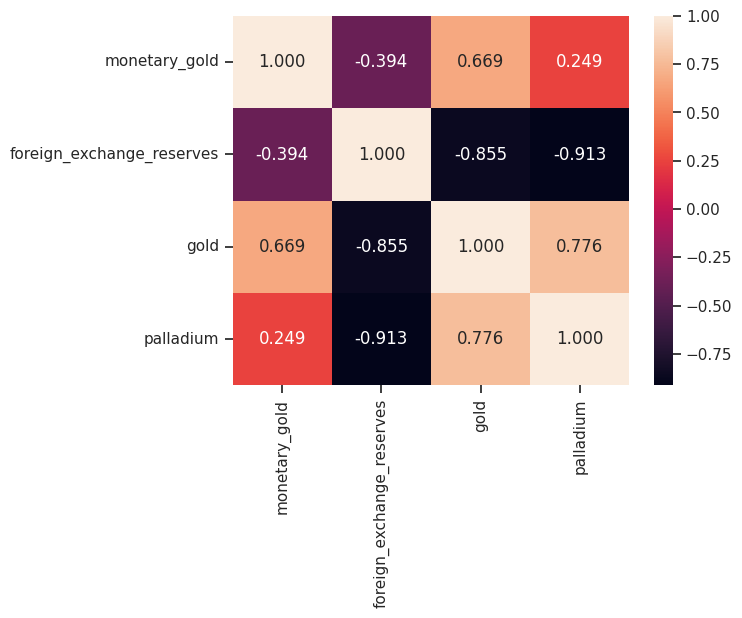

In [97]:
sns.heatmap(data[select_cls].corr(), annot=True, fmt='.3f')

In [98]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.8]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [99]:
make_corr_df(data[select_cls])

<ipython-input-98-713842ea2aed>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr = data.corr()


,f1,f2,corr
0,USD_840,dual_currency_basket,0.998107
1,dual_currency_basket,USD_840,0.998107
2,CNY_156,USD_840,0.997929
3,USD_840,CNY_156,0.997929
4,EUR_978,dual_currency_basket,0.996743
...,...,...,...
89,silver,gold,0.818134
90,BRL_986,INR_356,0.817530
91,INR_356,BRL_986,0.817530
92,gold,BRL_986,0.808894


In [100]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [101]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data[select_cls]))

<ipython-input-98-713842ea2aed>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr = data.corr()


[['dual_currency_basket',
  'CNY_156',
  'EUR_978',
  'INR_356',
  'foreign_exchange_reserves',
  'gold',
  'JPY_392',
  'platinum',
  'palladium',
  'USD_840'],
 ['platinum', 'INR_356', 'gold', 'BRL_986'],
 ['gold', 'silver']]

## 2).один метод из группы методов обертывания (wrapper methods);

In [102]:
from itertools import combinations
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# генерировать фиктивные данные
X, y = make_classification(n_samples=100, n_features=4, random_state=0)

# Создайте классификатор K-ближайших соседей
knn = KNeighborsClassifier()

# Выбор признаков по алгоритму грубой силы
best_score, best_features = 0, None
for k in range(1, X.shape[1] + 1):
    for subset in combinations(range(X.shape[1]), k):
        knn.fit(X[:, subset], y)
        score = knn.score(X[:, subset], y)
        if score > best_score:
            best_score, best_features = score, subset

# Вывод выбранных функций
print("best:", best_score)
print("feature index choosed:", best_features)

best: 0.94
feature index choosed: (0, 2)


## 3).один метод из группы методов вложений (embedded methods).

In [104]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/6_class_star.csv')
data.shape

(240, 7)

In [105]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(data[['Temperature (K)', 'Luminosity(L/Lo)']], data['Star color'])
# Коэффициенты регрессии
e_lr1.coef_

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([[ 1.78160499e-04,  4.30393916e-06],
       [ 2.86551849e-04, -2.82984140e-01],
       [ 2.01880111e-04, -1.03449370e-02],
       [ 8.52755446e-05, -1.04085639e-02],
       [ 1.14373486e-04, -2.76505078e-01],
       [ 5.42534965e-05, -8.77104536e-04],
       [ 1.02590471e-04, -2.88102298e-06],
       [-4.27757437e-03,  6.33247425e-05],
       [-7.03146245e-05, -1.83171204e-02],
       [ 1.71124396e-05, -2.77432233e-01],
       [-2.79400988e-03, -3.05582389e-06],
       [-3.78587226e-05,  1.45208868e-06],
       [ 1.14008342e-05, -8.28198842e-03],
       [ 5.25637376e-05, -7.88033190e-04],
       [-7.71414952e-05, -3.36578397e-02],
       [ 9.85413701e-05, -2.29735367e-02],
       [ 1.30399379e-04, -7.80230832e-03],
       [-1.04264661e-05, -4.09190952e-03],
       [-1.30996283e-04, -9.56398419e-02]])

In [106]:
# Все 2 признака являются "хорошими"
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(data[['Temperature (K)', 'Luminosity(L/Lo)']], data['Star color'])
sel_e_lr1.get_support()

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([ True,  True])